In [1]:
import tensorflow as tf
import numpy as np
from keras.datasets import mnist

In [2]:
# 获取手写数字数据集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# 训练集数据维度的调整：N H W C
train_images = np.reshape(train_images,(train_images.shape[0],train_images.shape[1],train_images.shape[2],1))
# 测试集数据维度的调整：N H W C
test_images = np.reshape(test_images,(test_images.shape[0],test_images.shape[1],test_images.shape[2],1))

In [3]:
def get_train(size):
    index = np.random.randint(0, np.shape(train_images)[0], size)
    resized_images = tf.image.resize_with_pad(train_images[index],224,224,)
    
    return resized_images.numpy(), train_labels[index]

def get_test(size):
    index = np.random.randint(0, np.shape(test_images)[0], size)
    resized_images = tf.image.resize_with_pad(test_images[index],224,224,)

    return resized_images.numpy(), test_labels[index]

train_images,train_labels = get_train(256)
test_images,test_labels = get_test(128)

In [4]:
def vgg_block(num_conv,num_filters):
    # 序列模型
    blk = tf.keras.models.Sequential()
    # 遍历卷积层
    for _ in range(num_conv):
        # 设置卷积层
        blk.add(tf.keras.layers.Conv2D(num_filters,kernel_size=3,padding='same',activation="relu"))
    # 池化层
    blk.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
    return blk

In [5]:
def vgg(conv_arch):
    # 序列模型
    net = tf.keras.models.Sequential()
    # 生成卷积部分
    for (num_convs,num_filters) in conv_arch:
        net.add(vgg_block(num_convs,num_filters))
    # 全连接层
    net.add(tf.keras.models.Sequential([
        # 展评
        tf.keras.layers.Flatten(),
        # 全连接层
        tf.keras.layers.Dense(4096,activation="relu"),
        # 随机失活
        tf.keras.layers.Dropout(0.5),
        # 全连接层
        tf.keras.layers.Dense(4096,activation="relu"),
        # 随机失活
        tf.keras.layers.Dropout(0.5),
        # 输出层
        tf.keras.layers.Dense(10,activation="softmax")
    ]))
    return net

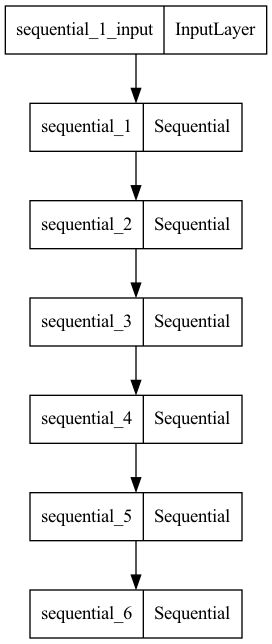

In [6]:
# 卷积块的参数
conv_arch = ((2,64),(2,128),(3,256),(3,512),(3,512))
net = vgg(conv_arch)

X = tf.random.uniform((1,224,224,1))
y = net(X)
tf.keras.utils.plot_model(net)

In [7]:
# 指定优化器，损失函数和评价指标
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0)

net.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
net.fit(train_images,train_labels,batch_size=128,epochs=3,verbose=1,validation_split=0.1)


Epoch 1/3


2023-04-11 20:17:39.239519: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2/2 [==============================] - 61s 27s/step - loss: 2.3307 - accuracy: 0.1130 - val_loss: 2.3012 - val_accuracy: 0.0769
Epoch 2/3
2/2 [==============================] - 57s 26s/step - loss: 2.2607 - accuracy: 0.1783 - val_loss: 2.2961 - val_accuracy: 0.0385
Epoch 3/3
2/2 [==============================] - 56s 26s/step - loss: 2.2354 - accuracy: 0.1652 - val_loss: 2.2754 - val_accuracy: 0.2692


In [8]:
loss,accuracy = net.evaluate(test_images,test_labels,verbose=1)
print("损失值",loss)
print("准确率", accuracy)

4/4 [==============================] - 8s 2s/step - loss: 2.1632 - accuracy: 0.3984
损失值 2.16321063041687
准确率 0.3984375
